In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
% matplotlib inline


## Q1: Using Music Sales.csvPreview the document, make a time series plot for sales in US and Canada. Here is a useful resource (Links to an external site.)Links to an external site.. 

In [3]:
music = pd.read_csv("Music Sales.csv")

In [4]:
music.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99


In [13]:
music.Country.value_counts()

USA               478
Canada            288
France            188
Brazil            183
Germany           142
United Kingdom    111
Czech Republic     74
Portugal           72
India              70
Netherlands        38
Italy              38
Austria            38
Poland             38
Finland            38
Hungary            38
Chile              38
Sweden             38
Denmark            38
Argentina          37
Norway             35
Spain              32
Belgium            31
Ireland            30
Australia          30
Name: Country, dtype: int64

In [14]:
df_uc = music[(music["Country"] == "Canada") | (music["Country"] == "USA")]

In [15]:
df_uc.Country.value_counts()

USA       478
Canada    288
Name: Country, dtype: int64

In [17]:
df_uc['RSales'] = df_uc['Quantity'] * df_uc['UnitPrice']

C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_uc.columns

Index(['Album', 'Artist', 'Bytes', 'Sales', 'City', 'Company', 'Composer',
       'Country', 'CustomerID', 'Email', 'FirstName', 'Genre', 'InvoiceDate',
       'InvoiceID', 'LastName', 'MediaType', 'Milliseconds',
       'Number of Records', 'Phone', 'PostalCode', 'Quantity', 'Region',
       'State', 'Track', 'UnitPrice', 'RSales'],
      dtype='object')

In [24]:
df_uc_Sale = df_uc.groupby(['Country', 'InvoiceDate'])['RSales'].agg("sum")

In [36]:
df_uc_Sale =df_uc_Sale.reset_index()

In [40]:
df_uc_Sale.dtypes

index            int64
Country         object
InvoiceDate     object
RSales         float64
dtype: object

In [41]:
df_uc_Sale['InvoiceDate'] = pd.to_datetime(df_uc_Sale['InvoiceDate'])

In [42]:
df_uc_Sale.sort_values(by=['InvoiceDate'], inplace = True)

In [43]:
df_uc_Sale.head(10)

,index,Country,InvoiceDate,RSales
5,5,Canada,2008-01-06,31.68
53,53,USA,2008-01-11,42.57
78,78,USA,2008-02-19,3.96
86,86,USA,2008-03-04,7.92
87,87,USA,2008-03-05,12.87
88,88,USA,2008-03-06,18.81
30,30,Canada,2008-03-09,27.72
90,90,USA,2008-04-14,30.69
33,33,Canada,2008-04-22,0.99
41,41,Canada,2008-06-05,2.97


C:\Users\kids1\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


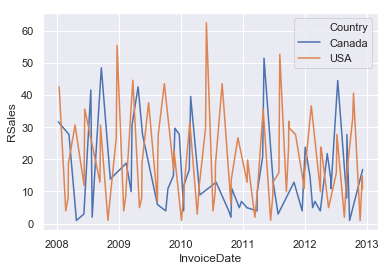

In [44]:
sns.set(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x="InvoiceDate", y="RSales",
             hue="Country", 
             data=df_uc_Sale)

## Q2: Using Music Sales.csv, explore how Rock music monthly market share fluctuate in US in 2011 and 2012.